In [2]:
import numpy as np
import pandas as pd

input_file = "AI.csv"
df = pd.read_csv(input_file,header=0,dtype={
                     'ATA_CAUSE': str,
                     'ATA_SYMPTOM': str
                     })

D:\Programs\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (21,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Unnamed: 0,AI_DATE,AC_MODEL,AC_SN,OPERATOR_CODE,EVENT_RECORD_IDENTIFIER,DIVERTED_LANDING,AIR_TURN_BACK,REJECTED_TAKE_OFF,GROUND_TURN_BACK,...,ATA_CAUSE,INTERRUPTION_REASON,CORRECTIVE_ACTION,AI_ID,EDIT_DATE,EDITED_BY,Unnamed: 23,ATA_CHAPTER,ATA_CHAPTER_CAUSE,AI_DATE_1
0,0,29-Mar-20,CRJ700,15299,EDV,NaN,0,N,N,Y,...,308102,ICE DET (X) FAIL - STATUS,DEFERRED - REPLACED ICE DETECTOR,590931,13-May-20,T12540,NaN,30,30,20
1,1,30-Mar-20,CRJ700,15125,EDV,NaN,0,N,N,Y,...,243101,TRU FAN FAIL - STATUS,DEFERRED - REPLACED TRU,590932,13-May-20,T12540,NaN,24,24,20
2,2,30-Mar-20,CRJ700,10176,EDV,NaN,0,N,N,Y,...,361315,ISOL FAIL - CAUTION,REPLACED ISOLATION VALVE,590933,13-May-20,T12540,NaN,36,36,20
3,3,3-Apr-20,CRJ700,15046,JZA,NaN,0,N,N,Y,...,302201,Incident: RTRN L COWL ANTI ICE CAUTION MSG. L ...,(Resolved On W/O: 684248 Taskcard: NR-00001 ) ...,591076,27-May-20,T12540,NaN,30,30,20
4,4,8-Apr-20,CRJ700,15044,JZA,NaN,0,N,N,Y,...,213108,Incident: RTRN OVBD COOL CAUTION MESSAGE DISPL...,(Resolved On W/O: 684350 Taskcard: NR-00001 ) ...,591077,27-May-20,T12540,NaN,21,21,20


In [16]:
df.columns

Index(['AI_DATE', 'AC_MODEL', 'AC_SN', 'OPERATOR_CODE',
       'EVENT_RECORD_IDENTIFIER', 'DIVERTED_LANDING', 'AIR_TURN_BACK',
       'REJECTED_TAKE_OFF', 'GROUND_TURN_BACK', 'ABORTED_APPROACH',
       'EMERGENCY_DESCENT', 'SMOKE', 'EMERGENCY_LANDING', 'INFLIGHT_SHUTDOWN',
       'GEN_AIR_INTERRUPT', 'GEN_GROUND_INTERRUPT', 'ATA_SYMPTOM', 'ATA_CAUSE',
       'INTERRUPTION_REASON', 'CORRECTIVE_ACTION', 'AI_ID', 'EDIT_DATE',
       'EDITED_BY', 'Unnamed: 23'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51780 entries, 1 to 51780
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            51780 non-null  int64 
 1   AI_DATE               51780 non-null  object
 2   AC_MODEL              51780 non-null  object
 3   AC_SN                 51780 non-null  int64 
 4   DIVERTED_LANDING      51780 non-null  int64 
 5   AIR_TURN_BACK         51780 non-null  object
 6   REJECTED_TAKE_OFF     51780 non-null  object
 7   GROUND_TURN_BACK      51780 non-null  object
 8   ABORTED_APPROACH      51780 non-null  object
 9   EMERGENCY_DESCENT     51780 non-null  object
 10  SMOKE                 51780 non-null  object
 11  EMERGENCY_LANDING     51780 non-null  object
 12  INFLIGHT_SHUTDOWN     51780 non-null  object
 13  GEN_AIR_INTERRUPT     51780 non-null  object
 14  GEN_GROUND_INTERRUPT  51780 non-null  object
 15  ATA_SYMPTOM           22961 non-null

In [51]:
len(df)

51781

In [18]:
#df = df.drop(['Unnamed: 23', 'EDIT_DATE','EDIT_DATE','OPERATOR_CODE','EVENT_RECORD_IDENTIFIER'], axis=1)
df = df.drop(['AI_DATE_1'],axis=1)
df.head()

,AI_DATE,AC_MODEL,AC_SN,DIVERTED_LANDING,AIR_TURN_BACK,REJECTED_TAKE_OFF,GROUND_TURN_BACK,ABORTED_APPROACH,EMERGENCY_DESCENT,SMOKE,...,GEN_AIR_INTERRUPT,GEN_GROUND_INTERRUPT,ATA_SYMPTOM,ATA_CAUSE,INTERRUPTION_REASON,CORRECTIVE_ACTION,AI_ID,EDITED_BY,ATA_CHAPTER,ATA_CHAPTER_CAUSE
1,30-Mar-20,CRJ700,15125,0,N,N,Y,N,N,N,...,N,N,2431.0,243101,TRU FAN FAIL - STATUS,DEFERRED - REPLACED TRU,590932,T12540,24,24
2,30-Mar-20,CRJ700,10176,0,N,N,Y,N,N,N,...,N,N,3613.0,361315,ISOL FAIL - CAUTION,REPLACED ISOLATION VALVE,590933,T12540,36,36
3,3-Apr-20,CRJ700,15046,0,N,N,Y,N,N,N,...,N,N,3022.0,302201,Incident: RTRN L COWL ANTI ICE CAUTION MSG. L ...,(Resolved On W/O: 684248 Taskcard: NR-00001 ) ...,591076,T12540,30,30
4,8-Apr-20,CRJ700,15044,0,N,N,Y,N,N,N,...,N,N,213108.0,213108,Incident: RTRN OVBD COOL CAUTION MESSAGE DISPL...,(Resolved On W/O: 684350 Taskcard: NR-00001 ) ...,591077,T12540,21,21
5,10-Apr-20,CRJ700,15037,0,N,Y,N,N,N,N,...,N,N,5270.0,5270,Incident: ABRT R AFT EMER DOOR CAUTION MSG DUR...,(Resolved On W/O: 684680 Taskcard: NR-00002 ) ...,591078,T12540,52,52


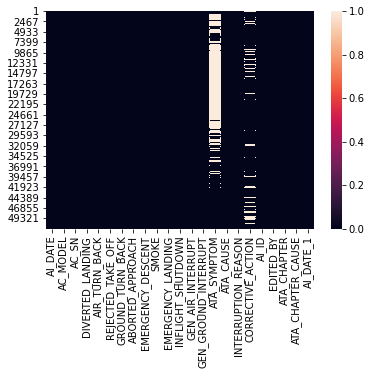

In [17]:
#df['ATA_SYMPTOM'].isnull().sum()
#half oof them are just a space(nan)
import seaborn as sns
sns.heatmap(df.isnull())

Numbers of null value in these columns.
There are 28819 rows with empty ATA_SYMPTOM values(total  rows: 51780)
There are 7838 rows with empty CORRECTIVE_ACTION

print(df['ATA_SYMPTOM'].isna().sum())
print(df['ATA_CAUSE'].isna().sum())
print(df['CORRECTIVE_ACTION'].isna().sum())

In [14]:
d = {'Y':1,'N':0}
df['DIVERTED_LANDING'] = df['DIVERTED_LANDING'].map(d)

In [ ]:
How many categories do we have?

In [19]:
df['ATA_SYMPTOM'].nunique()

498

In [20]:
df['ATA_CAUSE'].nunique()

1644

In [32]:
df = df.astype({"ATA_SYMPTOM": 'str', "ATA_CAUSE": 'str'}) 

df['ATA_CHAPTER'] =  [x[:2] for x in df['ATA_SYMPTOM']]

In [34]:
df['ATA_CHAPTER'].nunique()

42

In [36]:
df.ATA_CHAPTER.unique()
#INLCUDE NA AND ZERO

array(['30', '24', '36', '21', '52', '32', '27', '29', '49', '23', '31',
       '56', '0.', '80', '28', '20', '79', '34', '53', '78', '22', '25',
       '12', '72', '71', '77', '74', '33', '76', '26', '55', '35', '51',
       '38', 'na', '75', '73', '11', '57', '45', '54', '10'], dtype=object)

In [37]:
df['ATA_CHAPTER_CAUSE'] =  [x[:2] for x in df['ATA_CAUSE']]

In [38]:
df['ATA_CHAPTER_CAUSE'].nunique()

44

In [40]:
df['AI_DATE_1'] =  [x[-2:] for x in df['AI_DATE']]

In [41]:
df['AI_DATE_1']

0        20
1        20
2        20
3        20
4        20
         ..
51776    19
51777    19
51778    19
51779    19
51780    19
Name: AI_DATE_1, Length: 51781, dtype: object

In [42]:
from collections import Counter
c = Counter(df['AI_DATE_1'])

In [46]:
c

Counter({'20': 2345,
         '19': 3851,
         '10': 6588,
         '09': 5968,
         '15': 3448,
         '14': 3971,
         '13': 4150,
         '12': 4578,
         '11': 5112,
         '16': 4199,
         '17': 4082,
         '18': 3489})

In [47]:
df.to_csv('AI.csv')

In [13]:
df['ATA_CAUSE'].value_counts()

240       2924
200       1231
276105     940
3251       836
0          664
          ... 
524106       1
324205       1
351205       1
276109       1
252206       1
Name: ATA_CAUSE, Length: 1644, dtype: int64

In [14]:
df['ATA_SYMPTOM'].value_counts().head(10)

240     2859
3251     835
8011     813
3231     670
0        664
5270     527
2151     504
200      498
3621     440
2751     421
Name: ATA_SYMPTOM, dtype: int64

In [10]:
#df['ATA_SYMPTOM'].value_counts().sort_index()